# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell!

**DO NOT DELETE THIS CELL**


## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa4.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is not required for this assignment.If you want to document a function or a process, just comment or use markup cell.
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.
9. Only Seaborn,numpy,pandas,sklearn,matplotlib packages will be allowed. Failing to abide will lead to a **-10 decrement in your scores.**
10. All visualizations (including scatter plots) should have at least 4-5 meaningful lines explaining about it. Failure to do so, will lead to reduction in marks.


## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


You have 3 dataset files . 
You need to submit this ipython file after renaming it. 
Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [ ]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only

# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only


import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



In [ ]:
df_data=pd.read_csv("College.csv")
df_data.head()


Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

In [ ]:
#no null values in the dataset
df_data.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [ ]:
#https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# Attributes private and unnamed:0 (first column) are neither float nor integers hence convertig them into integers using labelencoders.


le = LabelEncoder()
Private = le.fit_transform(df_data.Private)
df_data["Private"]= Private

# there is no attribute name for column 1 hence using factorize
# https://pandas.pydata.org/docs/reference/api/pandas.factorize.html
pd.factorize (df_data.iloc[:, 0])
df_data.iloc[:, 0], Unique = pd.factorize (df_data.iloc[:, 0] )




In [ ]:
df_data

Unnamed: 0  Private   Apps  Accept  Enroll  Top10perc  Top25perc  \
0             0        1   1660    1232     721         23         52   
1             1        1   2186    1924     512         16         29   
2             2        1   1428    1097     336         22         50   
3             3        1    417     349     137         60         89   
4             4        1    193     146      55         16         44   
..          ...      ...    ...     ...     ...        ...        ...   
772         772        0   2197    1515     543          4         26   
773         773        1   1959    1805     695         24         47   
774         774        1   2097    1915     695         34         61   
775         775        1  10705    2453    1317         95         99   
776         776        1   2989    1855     691         28         63   

     F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0           2885          537      7440        3300    450      2200   70   
1           2683         1227     12280        6450    750      1500   29   
2           1036           99     11250        3750    400      1165   53   
3            510           63     12960        5450    450       875   92   
4            249          869      7560        4120    800      1500   76   
..           ...          ...       ...         ...    ...       ...  ...   
772         3089         2029      6797        3900    500      1200   60   
773         2849         1107     11520        4960    600      1250   73   
774         2793          166      6900        4200    617       781   67   
775         5217           83     19840        6510    630      2115   96   
776         2988         1726      4990        3560    500      1250   75   

     Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0          78       18.1           12    7041         60  
1          30       12.2           16   10527         56  
2          66       12.9           30    8735         54  
3          97        7.7           37   19016         59  
4          72       11.9            2   10922         15  
..        ...        ...          ...     ...        ...  
772        60       21.0           14    4469         40  
773        75       13.3           31    9189         83  
774        75       14.4           20    8323         49  
775        96        5.8           49   40386         99  
776        75       18.1           28    4509         99  

[777 rows x 19 columns]

In [ ]:
# This code for standardizing the data
"""from sklearn import preprocessing
columns = df_data.columns
values = df_data.values
Scaler = preprocessing.MinMaxScaler()
tempScaled = Scaler.fit_transform(values)
standard_data = pd.DataFrame(tempScaled,columns=columns)"""

'from sklearn import preprocessing\ncolumns = df_data.columns\nvalues = df_data.values\nScaler = preprocessing.MinMaxScaler()\ntempScaled = Scaler.fit_transform(values)\nstandard_data = pd.DataFrame(tempScaled,columns=columns)'

C:\Users\navee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  f"KMeans is known to have a memory leak on Windows "


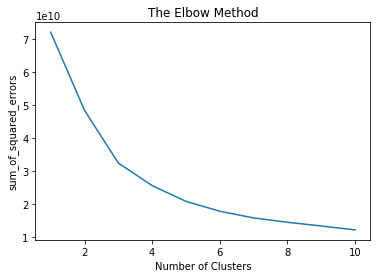

In [ ]:
#########################begin code for Task 1-a
# Calculating sum of squared errors for K values in the range of 1-10

sum_of_squared_errors=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(df_data)
    sum_of_squared_errors.append(kmeans.inertia_)

plt.plot(range(1,11),sum_of_squared_errors)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('sum_of_squared_errors')
plt.show()
## Describe which is the optimal value for K and explain why you choose it as the optimal value


We can clearly see that the elbow is at k=3, after k=3 the curve is almost parallel to X-axis. we can also use the Silhouette Method to find the optimal value of K.

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2,3,4 and visualize the predicted training samples and actual training samples on scatter plots. Use 80% of the dataset for training and 20% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [ ]:
###################begin code for Task 1-b-1: Split the datasetand set the random_state as 2021 without fail

### Important!!!
# Private is the class label hence dropping the classlabel
# store the class label in y and drop the class label
y_data = df_data['Private']
X_data= df_data.drop('Private',axis =1)

#Splitting the dataset: 80% train and 20% test dataset.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size = 0.2,random_state=2021)
print("lenght of the train dataset",(X_train.shape))
print("length of the test dataset",(X_test.shape))
###################end code for Task 1-b-1

lenght of the train dataset (621, 18)
length of the test dataset (156, 18)


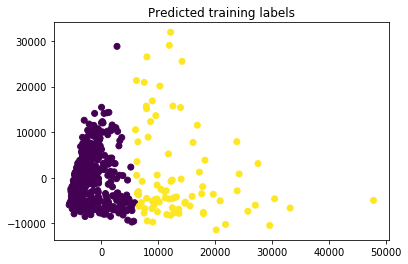

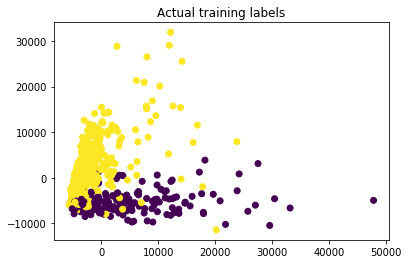

In [ ]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
# for K=2
Kmeans = KMeans(n_clusters=2, random_state=2021)


# Compute cluster centers and predict cluster index for each sample 
clusters_index_train2 = Kmeans.fit_predict(X_train)

# Model and fit the data to the PCA model
X_train_pca = PCA(n_components=2).fit_transform(X_train)


# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# After applying PCA 18D is converted to 2D(x,y)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

plt.title("Predicted training labels")
plt.scatter(x,y,c=clusters_index_train2)
plt.show()
plt.title("Actual training labels")
plt.scatter(x,y,c=y_train)
plt.show()

## Visualize using K=2,3,4 as well



###################end code for Task 1-b-2


1. Kmeans model is trained with number of cluster=2 and we are using PCA to reduce the dimensionality.<br>
2. The original 18dimensional data is converted into 2D using PCA.<br>
3. In the above graph, there are two clusters (purple and yellow). Both the clusters are separated well in predicted training labels.<br>

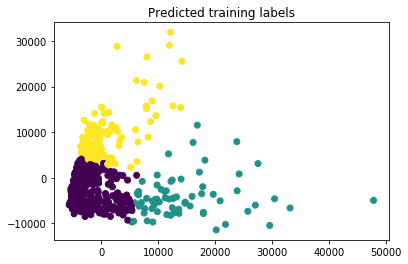

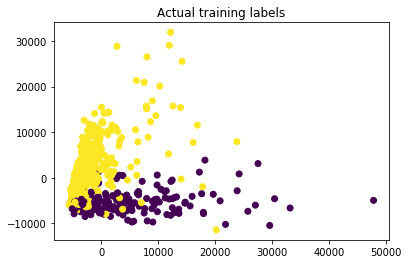

In [ ]:
# For K=3
# Create the KMeans model
Kmeans = KMeans(n_clusters=3, random_state=2021)


# Compute cluster centers and predict cluster index for each sample 
clusters_index_train3 = Kmeans.fit_predict(X_train)

# Model and fit the data to the PCA model
X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# After applying PCA 18D is converted to 2D(x,y)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
plt.title("Predicted training labels")
plt.scatter(x,y,c=clusters_index_train3)
plt.show()
plt.title("Actual training labels")
plt.scatter(x,y,c=y_train)
plt.show()

1. Kmeans model is trained with number of cluster=3 and we are using PCA to reduce the dimensionality.<br>
2. The original 18dimensional data is converted into 2D using PCA.<br>
3. In the above graph, there are three clusters (purple, yellow and green). These clusters are separated well in predicted training labels.<br>
4. In the actual training lables we have only two clusters because the class label is binary.

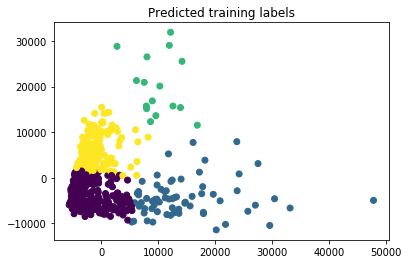

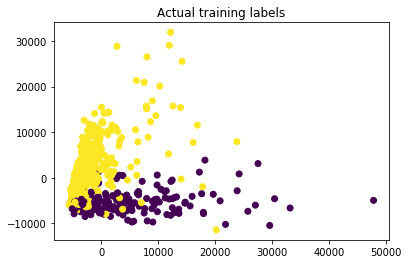

In [ ]:
# For K=4
# Create the KMeans model
Kmeans = KMeans(n_clusters=4, random_state=2021)


# Compute cluster centers and predict cluster index for each sample 
clusters_index_train4 = Kmeans.fit_predict(X_train)

# Model and fit the data to the PCA model
X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# After applying PCA 18D is converted to 2D(x,y)

x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
plt.title("Predicted training labels")
plt.scatter(x,y,c=clusters_index_train4)
plt.show()
plt.title("Actual training labels")
plt.scatter(x,y,c=y_train)
plt.show()

1. Kmeans model is trained with number of cluster=4 and we are using PCA to reduce the dimensionality.<br>
2. The original 18dimensional data is converted into 2D using PCA.<br>
3. In the above graph, there are four clusters. These clusters are separated well in predicted training labels.<br>


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

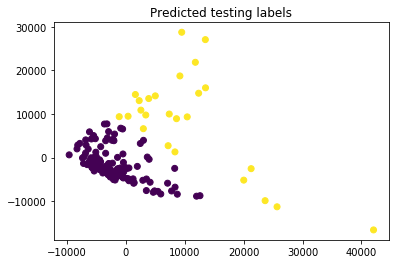

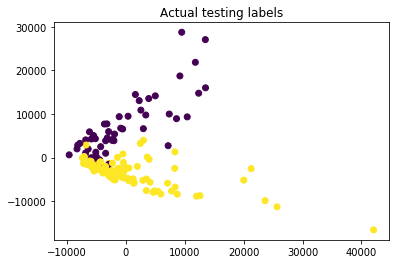

In [ ]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels

# for k=2
# predict cluster index for each sample 
kmeans = KMeans(n_clusters=2, random_state=2021).fit(X_train) # fit has to happen only on training data
cluster_index_test2 = kmeans.predict(X_test)
#print(cluster_index_test2)

# Model and fit the data to the PCA model
X_test_pca = PCA(n_components=2).fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# After applying PCA 18D is converted to 2D(x,y)

x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

plt.title("Predicted testing labels")
plt.scatter(x,y,c=cluster_index_test2)
plt.show()
plt.title("Actual testing labels")
plt.scatter(x,y,c=y_test)
plt.show()


###################end code for Task 1-b-3

1. Kmeans model is trained with number of cluster=2 and we are using PCA to reduce the dimensionality.<br>
2. We fit the model using Train data and cluster index are predicted for X_test.
3. The original 18dimensional data is converted into 2D using PCA.<br>
4. In the above graph, there are two clusters. These clusters are separated well in predicted testing labels.<br>


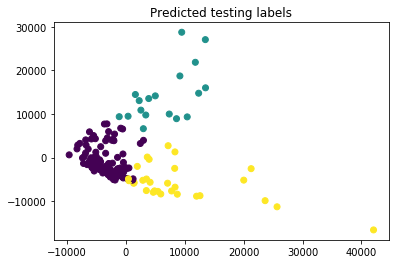

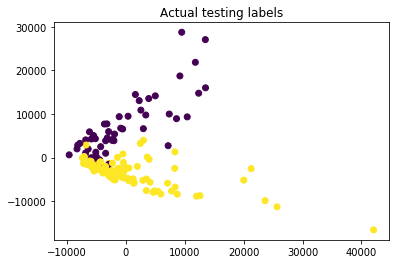

In [ ]:
# For k=3
# predict cluster index for each sample 
kmeans = KMeans(n_clusters=3, random_state=2021).fit(X_train)
cluster_index_test3 = kmeans.predict(X_test)


# Model and fit the data to the PCA model
X_test_pca = PCA(n_components=2).fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# After applying PCA 18D is converted to 2D(x,y)

x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

plt.title("Predicted testing labels")
plt.scatter(x,y,c=cluster_index_test3)
plt.show()
plt.title("Actual testing labels")
plt.scatter(x,y,c=y_test)
plt.show()

1. Kmeans model is trained with number of cluster=3 and we are using PCA to reduce the dimensionality.<br>
2. We fit the model using Train data and cluster index are predicted for X_test.
3. The original 18dimensional data is converted into 2D using PCA.<br>
4. In the above graph, there are three clusters. These clusters are separated well in predicted testing labels.<br>


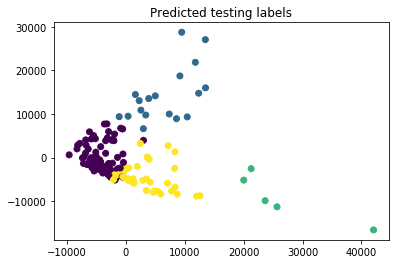

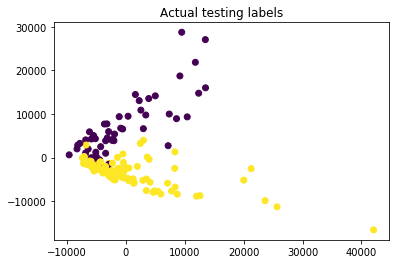

In [ ]:
# for k=4
# predict cluster index for each sample 
kmeans = KMeans(n_clusters=4, random_state=2021).fit(X_train)
cluster_index_test4 = kmeans.predict(X_test)


# Model and fit the data to the PCA model
X_test_pca = PCA(n_components=2).fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# After applying PCA 18D is converted to 2D(x,y)

x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

plt.title("Predicted testing labels")
plt.scatter(x,y,c=cluster_index_test4)
plt.show()
plt.title("Actual testing labels")
plt.scatter(x,y,c=y_test)
plt.show()

1. Kmeans model is trained with number of cluster=4 and we are using PCA to reduce the dimensionality.<br>
2. We fit the model using Train data and cluster index are predicted for X_test.
3. The original 18dimensional data is converted into 2D using PCA.<br>
4. In the above graph, there are four clusters. These clusters are separated well in predicted testing labels.<br>


In this step, you need to provide the evaluation of your clustering model. Print out a 2D confusion matrix.

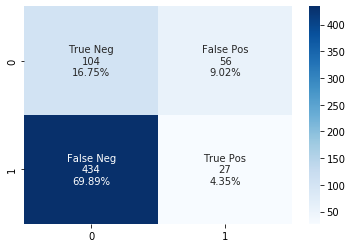

In [ ]:
###################begin code for Task 1-b-4: Print out a 2-D confusion matrix for all K values calculated above

#confusion matrix for number of clusters=2 for train data 
from sklearn.metrics import confusion_matrix 
cf_matrix = confusion_matrix(y_train,clusters_index_train2)

# Source : https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
# Below source code prints confusion matrix with counts and percentages of TP, FP,TN,FN
# group_names is the list of names (TP,FN,FP,FN)
# group_counts stores the count of TP,FN,FP,FN)
# group_percentage is the list of percentage of TP,FN,FP,TN

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

###################end code for Task 1-b-4

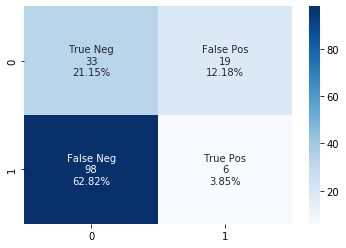

In [ ]:
#Confusion matrix for test data with k=2

#confusion matrix for number of clusters=2 
from sklearn.metrics import confusion_matrix 
cf_matrix = confusion_matrix(y_test,cluster_index_test2)

# Source : https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
# Below source code prints confusion matrix with counts and percentages of TP, FP,TN,FN
# group_names is the list of names (TP,FN,FP,FN)
# group_counts stores the count of TP,FN,FP,FN)
# group_percentage is the list of percentage of TP,FN,FP,TN

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')



In [ ]:
#Confusion matrix for train data with k=3

#confusion matrix for number of clusters=3 
print("Confusion matrix for training data with K=3")
from sklearn.metrics import confusion_matrix 
cf_matrix = confusion_matrix(y_train,clusters_index_train3)
print(cf_matrix)

# confusion matrix for number of clusters=3 for test data
print("Confusion matrix for testing data with K=3")

cf_matrix = confusion_matrix(y_test,cluster_index_test3)
print(cf_matrix)



Confusion matrix for training data with K=3
[[101  59   0]
 [333   8 120]
 [  0   0   0]]
Confusion matrix for testing data with K=3
[[33 18  1]
 [76  0 28]
 [ 0  0  0]]


In [ ]:
#Confusion matrix for train data with k=4

#confusion matrix for number of clusters=4
print("Confusion matrix for training data with K=4")
from sklearn.metrics import confusion_matrix 
cf_matrix = confusion_matrix(y_train,clusters_index_train4)
print(cf_matrix)

# confusion matrix for number of clusters=3 for test data
print("Confusion matrix for testing data with K=4")

cf_matrix = confusion_matrix(y_test,cluster_index_test4)
print(cf_matrix)



Confusion matrix for training data with K=4
[[ 99  59   0   2]
 [271   7  16 167]
 [  0   0   0   0]
 [  0   0   0   0]]
Confusion matrix for testing data with K=4
[[33 18  0  1]
 [61  0  5 38]
 [ 0  0  0  0]
 [ 0  0  0  0]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [ ]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score
#-------------------------------------------------------------
df = pd.read_csv('College.csv')

pd.factorize (df.iloc[:, 0])
df.iloc[:, 0], Unique = pd.factorize (df.iloc[:, 0] )

pd.factorize (df.Private)
df.Private, Unique = pd.factorize (df.Private)

X = df.drop('Private',axis =1)
#Taking Private attribute from the dataset
y = df['Private']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state=2021)
#-------------------------------------------------------------------------------------------
## Calculate pairwise distance matrix for X_train
pdm_train = X_train
cosine_distance = pairwise_distances(pdm_train,metric='cosine')
euclidean_distance = pairwise_distances(pdm_train,metric='euclidean')
manhattan_distance = pairwise_distances(pdm_train,metric='manhattan')

"""pdm_train = pairwise_distances(X_train)
print(pdm_train)"""

## complete linkage + cosine
complete_cosine_model=AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete').fit_predict(X_train)
complete_cosine_model_f1 = f1_score(y_train, complete_cosine_model)

## complete linkage + euclidean
complete_euclidean_model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete').fit_predict(X_train)
complete_euclidean_model_f1 = f1_score(y_train, complete_euclidean_model)

## complete linkage + manhattan
complete_manhattan_model = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete').fit_predict(X_train)
complete_manhattan_model_f1 = f1_score(y_train, complete_manhattan_model)

## average linkage + cosine
average_cosine_model=AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average').fit_predict(X_train)
average_cosine_model_f1 = f1_score(y_train, average_cosine_model)

## average linkage + euclidean
average_euclidean_model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average').fit_predict(X_train)
average_euclidean_model_f1 = f1_score(y_train, average_euclidean_model)

## Model and fit the training data to the AgglomerativeClustering model
average_manhattan_model=AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average').fit_predict(X_train)
average_manhattan_model_f1 = f1_score(y_train, average_manhattan_model)

## Print the 2-D confusion matrix with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. 

print("confusion matrix for complete linkage + cosine\n",confusion_matrix(y_train,complete_cosine_model))
print("confusion matrix for complete linkage + euclidean\n", confusion_matrix(y_train,complete_euclidean_model))
print("confusion matrix for complete linkage + manhattan\n", confusion_matrix(y_train,complete_manhattan_model))
print("confusion matrix for average linkage + cosine\n", confusion_matrix(y_train,average_cosine_model))
print("confusion matrix for average linkage + euclidean\n", confusion_matrix(y_train,average_euclidean_model))
print("confusion matrix for average linkage + manhattan\n", confusion_matrix(y_train,average_manhattan_model))


print("F1-score for complete linkage + cosine",complete_cosine_model_f1)
print("F1-score for complete linkage + euclidean", complete_euclidean_model_f1)
print("F1-score for complete linkage + manhattan", complete_manhattan_model_f1)
print("F1-score for average linkage + cosine", average_cosine_model_f1)
print("F1-score for average linkage + euclidean", average_euclidean_model_f1)
print("F1-score for average linkage + manhattan", average_manhattan_model_f1)
###################end code for Task 2-a



confusion matrix for complete linkage + cosine
 [[ 15 446]
 [ 93  67]]
confusion matrix for complete linkage + euclidean
 [[461   0]
 [159   1]]
confusion matrix for complete linkage + manhattan
 [[  8 453]
 [ 63  97]]
confusion matrix for average linkage + cosine
 [[ 13 448]
 [107  53]]
confusion matrix for average linkage + euclidean
 [[461   0]
 [159   1]]
confusion matrix for average linkage + manhattan
 [[461   0]
 [159   1]]
F1-score for complete linkage + cosine 0.19910846953937592
F1-score for complete linkage + euclidean 0.012422360248447204
F1-score for complete linkage + manhattan 0.2732394366197183
F1-score for average linkage + cosine 0.16036308623298035
F1-score for average linkage + euclidean 0.012422360248447204
F1-score for average linkage + manhattan 0.012422360248447204


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

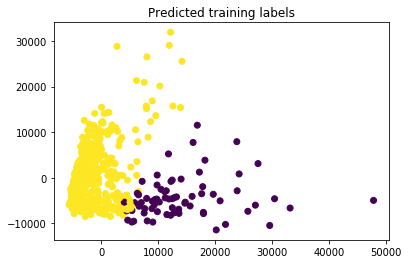

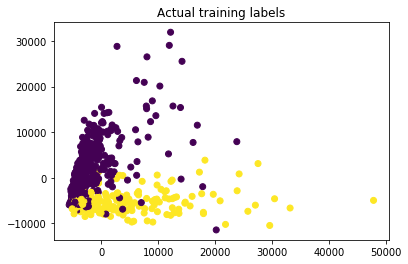

In [ ]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
# F1-Score for complete linkage + manhattan is the highest. Hence choosing this model as best model.
best_model = complete_manhattan_model # this model is already trained in task 2a

X_train_pca = PCA(n_components=2).fit_transform(X_train)
# Visualize the predicted training labels versus actual training labels. 
x = X_train_pca[:,0]
y = X_train_pca[:,1]
plt.scatter(x,y,c=best_model)
plt.title("Predicted training labels")
plt.show()
plt.scatter(x,y,c=y_train)
plt.title("Actual training labels")
plt.show()
###################end code for Task 2-b

1. F1-score for complete linkage + manhattan is highest i.e 0.2732394366197183. Hence we choose complete_manhattan_model as best model.
2. Pca is used for dimensionality reduction tenchique and 18D data is converted to 2D.
3. From the above scatter plots we can see that two clusters are wll separated in predicted training labels.

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. Use number cluster = 2 for below example

F1-score for complete linkage + cosine 0.9331075359864521
F1-score for complete linkage + euclidean 0.0
F1-score for complete linkage + manhattan 0.024999999999999998
F1-score for average linkage + cosine 0.9292256452955869
F1-score for average linkage + euclidean 0.0
F1-score for average linkage + manhattan 0.0


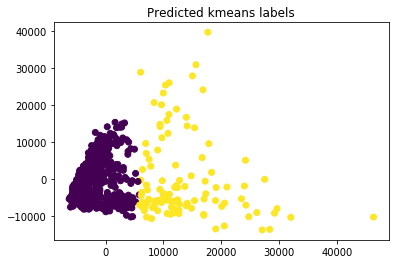

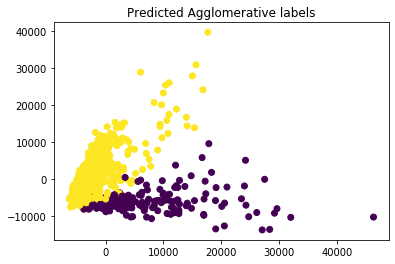

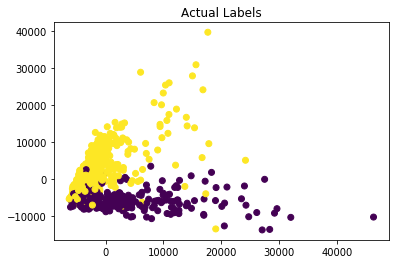

In [ ]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
kmeans_data = KMeans(n_clusters=2,random_state=2021)
kmeans_data_best_model = kmeans_data.fit_predict(X_data)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X_data
cosine_distance = pairwise_distances(X_data,metric='cosine')
euclidean_distance = pairwise_distances(X_data,metric='euclidean')
manhattan_distance = pairwise_distances(X_data,metric='manhattan')

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
## average linkage + manhattan
"""# from task-2-a we can see that AgglomerativeClustering with for complete linkage + manhattan gives the best result.
# Hence training only best model
complete_manhattan_model = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete').fit_predict(X_data)
f1 = f1_score(y_data,complete_manhattan_model)"""


## complete linkage + cosine
complete_cosine_model=AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete').fit_predict(X_data)
complete_cosine_model_f1 = f1_score(y_data, complete_cosine_model)

## complete linkage + euclidean
complete_euclidean_model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete').fit_predict(X_data)
complete_euclidean_model_f1 = f1_score(y_data, complete_euclidean_model)

## complete linkage + manhattan
complete_manhattan_model = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete').fit_predict(X_data)
complete_manhattan_model_f1 = f1_score(y_data, complete_manhattan_model)

## average linkage + cosine
average_cosine_model=AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average').fit_predict(X_data)
average_cosine_model_f1 = f1_score(y_data, average_cosine_model)

## average linkage + euclidean
average_euclidean_model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average').fit_predict(X_data)
average_euclidean_model_f1 = f1_score(y_data, average_euclidean_model)

## Model and fit the training data to the AgglomerativeClustering model
average_manhattan_model=AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average').fit_predict(X_data)
average_manhattan_model_f1 = f1_score(y_data, average_manhattan_model)

"""## Print the 2-D confusion matrix with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. 

print("confusion matrix for complete linkage + cosine\n",confusion_matrix(y_data,complete_cosine_model))
print("confusion matrix for complete linkage + euclidean\n", confusion_matrix(y_data,complete_euclidean_model))
print("confusion matrix for complete linkage + manhattan\n", confusion_matrix(y_data,complete_manhattan_model))
print("confusion matrix for average linkage + cosine\n", confusion_matrix(y_data,average_cosine_model))
print("confusion matrix for average linkage + euclidean\n", confusion_matrix(y_data,average_euclidean_model))
print("confusion matrix for average linkage + manhattan\n", confusion_matrix(y_data,average_manhattan_model))"""

print("F1-score for complete linkage + cosine",complete_cosine_model_f1)
print("F1-score for complete linkage + euclidean", complete_euclidean_model_f1)
print("F1-score for complete linkage + manhattan", complete_manhattan_model_f1)
print("F1-score for average linkage + cosine", average_cosine_model_f1)
print("F1-score for average linkage + euclidean", average_euclidean_model_f1)
print("F1-score for average linkage + manhattan", average_manhattan_model_f1)

### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X_data)
x = X_pca[:,0]
y = X_pca[:,1]

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
plt.scatter(x,y,c=kmeans_data_best_model)
plt.title("Predicted kmeans labels")
plt.show()
plt.scatter(x,y,c=complete_cosine_model)
plt.title("Predicted Agglomerative labels")
plt.show()
plt.title("Actual Labels")
plt.scatter(x,y,c=y_data)#actual
plt.show()




###################end code for Task 3-a

1. F1-score for complete linkage + cosine is highest which is 0.9331075359864521.<br>
2. Hence we will use complete_cosine_model as best_model
3. From the scatter plots above we can see that, the agglomerative model has clustered the data which is almost similar to Actual labels.<br>
4. Kmeans has clustered the data differently when compared with Actual labels.<br>
5. Hence the F1-score of Agglomerative is high compared to Kmeans for this dataset.<br>


## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out 2D confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model in at least 3-4 lines. Type your reasoning.

Confusion matrix

Kmeans:


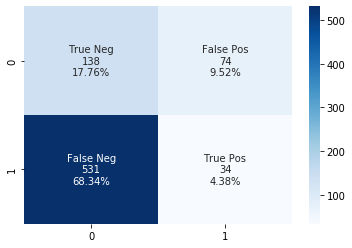

In [ ]:
###################begin code for Task 3-b

print("Confusion matrix\n")
kmeans_conf = confusion_matrix(y_data,kmeans_data_best_model)
print("Kmeans:")

roup_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                kmeans_conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     kmeans_conf.flatten()/np.sum(kmeans_conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(kmeans_conf, annot=labels, fmt='', cmap='Blues')



###################end code for Task 3-b

Agglomerative:


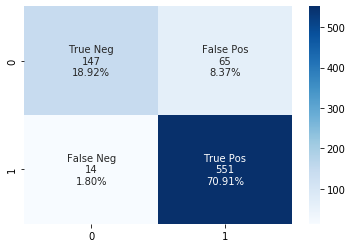

In [ ]:
print("Agglomerative:")
agglo_conf = confusion_matrix(y_data,complete_cosine_model)


roup_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                agglo_conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     agglo_conf.flatten()/np.sum(agglo_conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(agglo_conf, annot=labels, fmt='', cmap='Blues')

In [ ]:
print("\nPrecision\n")
kmeans_precision = precision_score(y_data,kmeans_data_best_model)
agglomerative_precision = precision_score(y_data,complete_cosine_model)
print("Kmeans:        ", kmeans_precision,"\nAgglomerative: ",agglomerative_precision)


print("\nRecall\n")

kmeans_recall = recall_score(y_data,kmeans_data_best_model)
agglomerative_recall = recall_score(y_data,complete_cosine_model)
print("Kmeans:        ", kmeans_recall,"\nAgglomerative: ",agglomerative_recall)



print("\nF1 Score\n")
kmeans_f1_score = f1_score(y_data,kmeans_data_best_model)
agglomerative_f1__score = f1_score(y_data,complete_cosine_model)
print("Kmeans:        ", kmeans_f1_score,"\nAgglomerative: ",agglomerative_f1__score)




Precision

Kmeans:         0.3148148148148148 
Agglomerative:  0.8944805194805194

Recall

Kmeans:         0.06017699115044248 
Agglomerative:  0.9752212389380531

F1 Score

Kmeans:         0.10104011887072809 
Agglomerative:  0.9331075359864521


1. college.csv dataset size is very small(777 rows).<br>
2. For this dataset the Performance of Kmeans is very poor and aglomertaive clustring model has high F1-score.<br>
3. F1 score of Agglomerative clustering is high (0.93) compared to Kmeans f1_score (0.1010).<br>
4. The F1-score of Agglomerative Model is very high because the dataset size is small.

## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[45 points] Task 1:</b>  

    [15 points] Task 1-a: Determine “k” value from the elbow method

    [30 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [05 points] Task 1-b-4: Print out a 2D confusion matrix
    


<b>[50 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [15 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[10 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points